##### Matin Moezi - 9512058 - DataMining Project - Spring 2020

# Problem 3

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_seq_items', -1)

In [244]:
df = pd.read_csv('data/arrhythmia.data')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,...,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,...,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,...,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,...,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,...,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,...,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Part (a): Handling Missing Data

### According to dataset doc. missing values distinguished with '?'

In [245]:
df[['T', 'P', 'QRST', 'J', 'heart_rate']] = df[['T', 'P', 'QRST', 'J', 'heart_rate']].apply(pd.to_numeric, errors='coerce')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,...,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,...,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,...,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,...,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,...,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,...,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [246]:
nan_counts = df.isnull().sum()
nan_counts[nan_counts != 0]

T             8  
P             22 
QRST          1  
J             376
heart_rate    1  
dtype: int64

In [247]:
df[df.isnull().any(axis=1)]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,...,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,...,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,...,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,...,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,...,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,NaN,84.0,0,36,48,0,0,20,0,0,0,0,...,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0.0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,45,0,175,75,91,134,376,160,83,91,68.0,31.0,80.0,NaN,70.0,0,32,32,0,0,20,0,0,0,0,...,-0.9,3.4,-11.3,17.2,-0.4,0.0,8.3,-5.1,0.0,0.0,-0.5,1.8,3.4,17.8,-0.4,0.0,7.1,-2.4,0.0,0.0,-0.4,1.3,8.5,17.6,1
446,20,1,157,57,81,151,363,166,80,43,42.0,72.0,42.0,NaN,75.0,0,48,0,0,0,28,0,0,0,0,...,0.6,5.9,28.9,84.3,0.0,0.0,9.1,-1.6,0.0,0.0,0.5,3.0,20.8,49.0,0.0,0.0,7.2,-0.7,0.0,0.0,0.5,2.3,17.6,39.2,1
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,NaN,63.0,0,52,24,0,0,28,0,0,0,0,...,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,NaN,73.0,0,44,36,0,0,24,0,0,0,0,...,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10


In [248]:
df.iloc[:,10:15]

,T,P,QRST,J,heart_rate
0,13.0,64.0,-2.0,NaN,63.0
1,37.0,-17.0,31.0,NaN,53.0
2,34.0,70.0,66.0,23.0,75.0
3,11.0,-5.0,20.0,NaN,71.0
4,13.0,61.0,3.0,NaN,NaN
...,...,...,...,...,...
447,4.0,40.0,-27.0,NaN,63.0
448,66.0,52.0,79.0,NaN,73.0
449,-19.0,-61.0,-70.0,84.0,84.0
450,29.0,-22.0,43.0,103.0,80.0


In [249]:
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=5)
df.iloc[:,10:15] = imp_knn.fit_transform(df.iloc[:,10:15])

In [250]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,...,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-62.0,63.0,0,52,44,0,0,32,0,0,0,0,...,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,17.0,53.0,0,48,0,0,0,24,0,0,0,0,...,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,...,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,-10.0,71.0,0,72,20,0,0,48,0,0,0,0,...,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,-63.0,69.0,0,48,40,0,0,28,0,0,0,0,...,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,-71.4,63.0,0,52,24,0,0,28,0,0,0,0,...,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,-35.2,73.0,0,44,36,0,0,24,0,0,0,0,...,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,84.0,16,40,40,0,0,40,0,0,0,0,...,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,103.0,80.0,0,56,0,0,0,32,0,0,0,0,...,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [251]:
df.isnull().sum().sum()

0

## Part (b): K Nearest Neighbor

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [253]:
X = df.iloc[:,:-1]
X

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,...,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-62.0,63.0,0,52,44,0,0,32,0,0,0,0,...,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,17.0,53.0,0,48,0,0,0,24,0,0,0,0,...,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,...,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,-10.0,71.0,0,72,20,0,0,48,0,0,0,0,...,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,-63.0,69.0,0,48,40,0,0,28,0,0,0,0,...,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,-71.4,63.0,0,52,24,0,0,28,0,0,0,0,...,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0.0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,-35.2,73.0,0,44,36,0,0,24,0,0,0,0,...,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0.0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,84.0,16,40,40,0,0,40,0,0,0,0,...,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0.0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,103.0,80.0,0,56,0,0,0,32,0,0,0,0,...,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0.0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


In [254]:
y = df['diagnosis']
y

0      8 
1      6 
2      10
3      1 
4      7 
      .. 
447    1 
448    10
449    2 
450    1 
451    1 
Name: diagnosis, Length: 452, dtype: int64

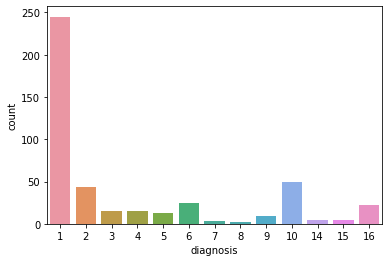

In [255]:
sns.countplot(y)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn_clf_1 = KNeighborsClassifier(n_neighbors=1)
knn_clf_30 = KNeighborsClassifier(n_neighbors=30)
knn_clf_1.fit(X_train, y_train)
knn_clf_30.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

## Evaluating Classifier

### 1) Evaluating Accuracy with k-fold Crass Validation

#### 1*) Train Set

In [257]:
from sklearn.model_selection import cross_val_score
mean_score_clf_1 = cross_val_score(knn_clf_1, X_train, y_train, cv=10, scoring="accuracy").mean()
mean_score_clf_30 = cross_val_score(knn_clf_30, X_train, y_train, cv=10, scoring="accuracy").mean()
print('Mean Accuracy Score for k = 1:' , mean_score_clf_1)
print('Mean Accuracy Score for k = 30:' , mean_score_clf_30)

Mean Accuracy Score for k = 1: 0.538608870967742
Mean Accuracy Score for k = 30: 0.5412298387096774


#### 1**) Test Set

In [258]:
mean_score_clf_1 = cross_val_score(knn_clf_1, X_test, y_test, cv=10, scoring="accuracy").mean()
mean_score_clf_30 = cross_val_score(knn_clf_30, X_test, y_test, cv=10, scoring="accuracy").mean()
print('Mean Accuracy Score for k = 1:' , mean_score_clf_1)
print('Mean Accuracy Score for k = 30:' , mean_score_clf_30)

Mean Accuracy Score for k = 1: 0.4719780219780219
Mean Accuracy Score for k = 30: 0.5510989010989011


### 2) Confusion Matrix

#### 2*) Train Set

#### Note: We use cross validation prediction that the prediction is made by a model that never saw the data during training 

In [259]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Confusion Matrix Train Set K = 1:
 [[129   6   0   2   4  10   2   1   0   9   1   0   6]
 [ 14  10   0   1   0   1   0   2   0   0   0   1   0]
 [  1   0  10   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   3   2   0   0   1   0   0   0   0   0]
 [  4   0   0   1   1   0   0   0   0   1   0   0   1]
 [ 12   0   0   0   0   2   0   0   0   0   0   0   1]
 [  1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   5   0   0   0   0]
 [ 23   0   1   0   2   2   0   0   0   9   0   0   2]
 [  3   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   1   1]
 [ 10   1   0   0   0   1   0   0   0   2   0   1   0]]


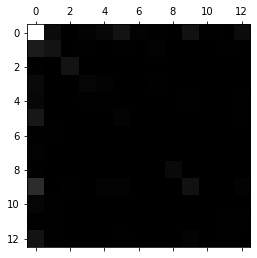

Confusion Matrix Train Set K = 30:
 [[170   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 29   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 38   0   0   0   0   0   0   0   0   1   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]]


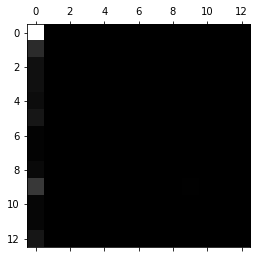

In [260]:
y_train_pred_clf_1 = cross_val_predict(knn_clf_1, X_train, y_train, cv=10)
y_train_pred_clf_30 = cross_val_predict(knn_clf_30, X_train, y_train, cv=10)
conf_matrix_train_cfl_1 = confusion_matrix(y_train, y_train_pred_clf_1)
conf_matrix_train_cfl_30 = confusion_matrix(y_train, y_train_pred_clf_30)
print('Confusion Matrix Train Set K = 1:\n', conf_matrix_train_cfl_1)
plt.matshow(conf_matrix_train_cfl_1, cmap=plt.cm.gray)
plt.show()
print('Confusion Matrix Train Set K = 30:\n', conf_matrix_train_cfl_30)
plt.matshow(conf_matrix_train_cfl_30, cmap=plt.cm.gray)
plt.show()

#### 2**) Test Set

Confusion Matrix Test Set K = 1:
 [[58  2  0  0  2  5  0  0  0  6  0  2]
 [ 8  1  0  1  0  0  0  0  0  3  1  1]
 [ 0  0  3  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  2  1  0  0  0  0  0  0  0]
 [ 2  1  0  0  1  0  0  0  0  1  0  0]
 [ 8  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  1  0  0  0]
 [ 6  0  0  0  0  2  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0]
 [ 5  1  0  1  0  0  0  0  0  0  0  0]]


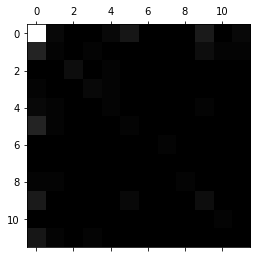

Confusion Matrix Test Set K = 30:
 [[75  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0]]


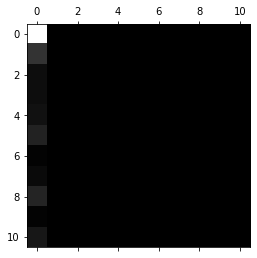

In [261]:
y_test_pred_clf_1 = knn_clf_1.predict(X_test)
y_test_pred_clf_30 = knn_clf_30.predict(X_test)
conf_matrix_test_clf_1 = confusion_matrix(y_test, y_test_pred_clf_1)
conf_matrix_test_clf_30 = confusion_matrix(y_test, y_test_pred_clf_30)
print('Confusion Matrix Test Set K = 1:\n', conf_matrix_test_clf_1)
plt.matshow(conf_matrix_test_clf_1, cmap=plt.cm.gray)
plt.show()
print('Confusion Matrix Test Set K = 30:\n', conf_matrix_test_clf_30)
plt.matshow(conf_matrix_test_clf_30, cmap=plt.cm.gray)
plt.show()

### 3) Precision, Recall and F1-Score

#### 3*) Train Set

In [262]:
from sklearn.metrics import classification_report
print('Classification Report Train Set K = 1:\n', classification_report(y_train, y_train_pred_clf_1))
print('Classification Report Train Set K = 30:\n', classification_report(y_train, y_train_pred_clf_30))

Classification Report Train Set K = 1:
               precision    recall  f1-score   support

           1       0.63      0.76      0.69       170
           2       0.50      0.34      0.41        29
           3       0.91      0.91      0.91        11
           4       0.43      0.27      0.33        11
           5       0.11      0.12      0.12         8
           6       0.12      0.13      0.13        15
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      0.83      0.91         6
          10       0.43      0.23      0.30        39
          14       0.00      0.00      0.00         4
          15       0.33      0.25      0.29         4
          16       0.00      0.00      0.00        15

    accuracy                           0.54       316
   macro avg       0.34      0.30      0.31       316
weighted avg       0.51      0.54      0.52       316

Classification Report Train Set K = 30:

In [263]:
print('Classification Report Test Set K = 1:\n', classification_report(y_test, y_test_pred_clf_1))
print('Classification Report Test Set K = 30:\n', classification_report(y_test, y_test_pred_clf_30))

Classification Report Test Set K = 1:
               precision    recall  f1-score   support

           1       0.65      0.77      0.71        75
           2       0.14      0.07      0.09        15
           3       1.00      0.75      0.86         4
           4       0.50      0.50      0.50         4
           5       0.20      0.20      0.20         5
           6       0.12      0.10      0.11        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      0.33      0.50         3
          10       0.23      0.27      0.25        11
          15       0.50      1.00      0.67         1
          16       0.00      0.00      0.00         7

    accuracy                           0.52       136
   macro avg       0.36      0.33      0.32       136
weighted avg       0.48      0.52      0.49       136

Classification Report Test Set K = 30:
               precision    recall  f1-score   support


### 4) ROC Curve & Area Under Curve Score (AUC)

#### 4*) Train Set

In [264]:
from sklearn.metrics import roc_curve, auc

In [265]:
def plot_roc_curve(tpr_1, fpr_1, tpr_30, fpr_30, auc_score_1, auc_score_30, class_):
    fig, axes = plt.subplots(1, 2)
    axes[0].plot([0,1],[0,1],'k--')
    axes[0].plot(fpr_1,tpr_1, label='area = %0.2f' % auc_score_1)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('K = 1')
    axes[0].legend(loc="upper left")
    axes[1].plot([0,1],[0,1],'k--')
    axes[1].plot(fpr_30,tpr_30, label='area = %0.2f' % auc_score_30)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('K = 30')
    axes[1].legend(loc="upper left")
    fig.suptitle('KNN ROC curve class %s' % class_, y=1)
    fig.tight_layout()
    

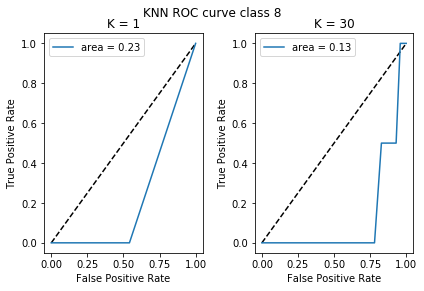

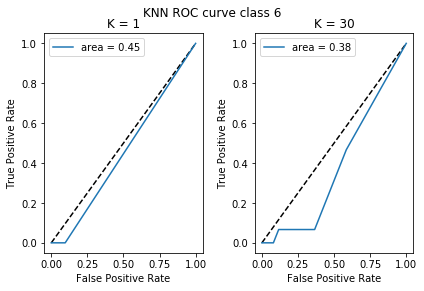

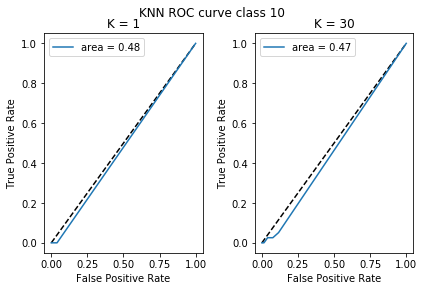

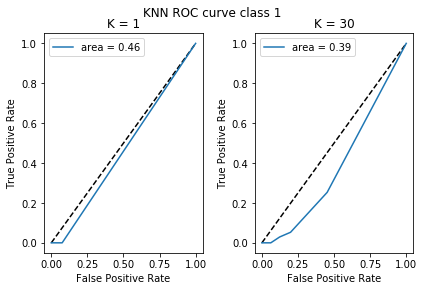

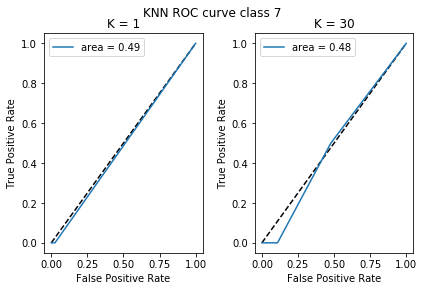

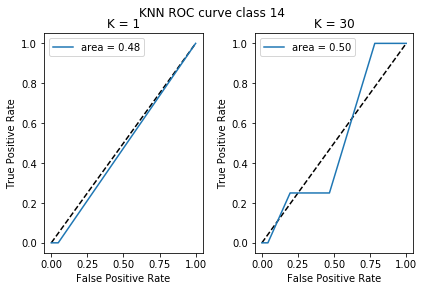

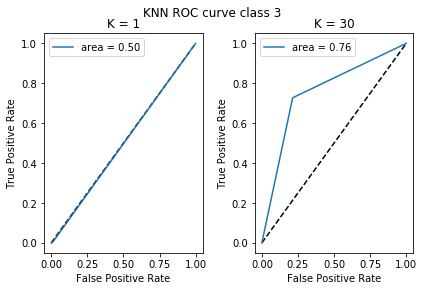

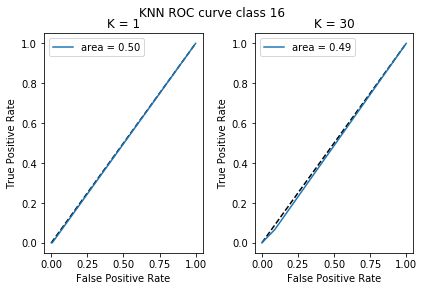

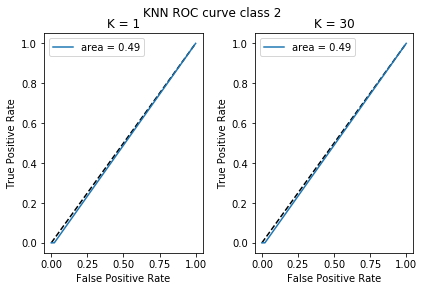

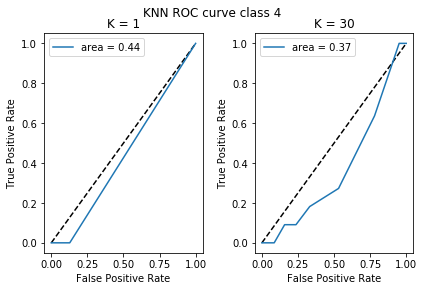

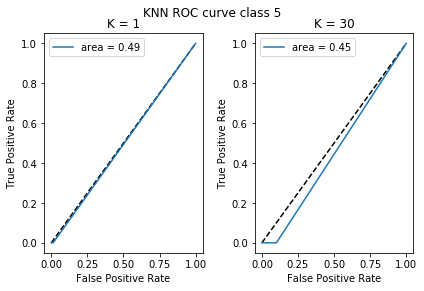

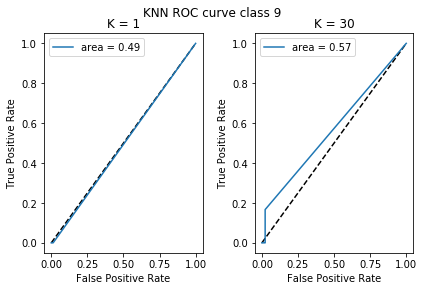

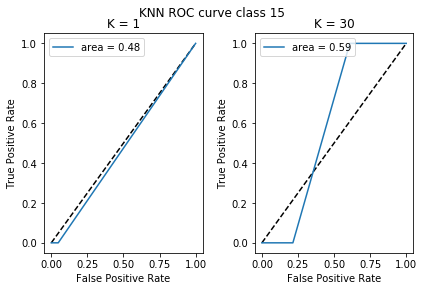

In [266]:
y_train_score_clf_1 = knn_clf_1.predict_proba(X_train)
y_train_score_clf_30 = knn_clf_30.predict_proba(X_train)
fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
fpr_30 = dict()
tpr_30 = dict()
roc_auc_30 = dict()
for i, label in enumerate(y.unique()):
    fpr_1[label], tpr_1[label], _ = roc_curve((y_train == label).astype(int), y_train_score_clf_1[:, i])
    roc_auc_1[label] = auc(fpr_1[label], tpr_1[label])
    fpr_30[label], tpr_30[label], _ = roc_curve((y_train == label).astype(int), y_train_score_clf_30[:, i])
    roc_auc_30[label] = auc(fpr_30[label], tpr_30[label])
    plot_roc_curve(tpr_1[label], fpr_1[label],tpr_30[label], fpr_30[label], roc_auc_1[label], roc_auc_30[label], label)

#### 4**) Test Set

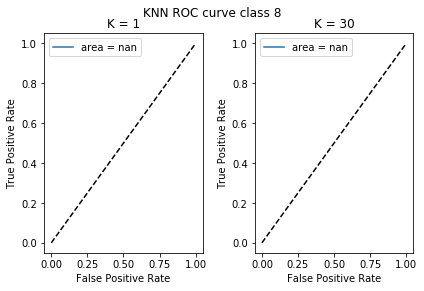

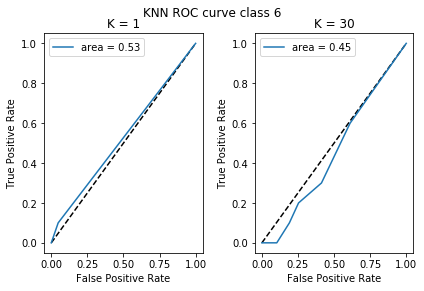

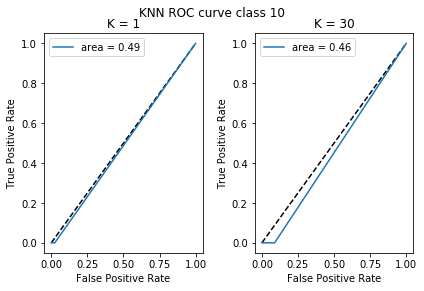

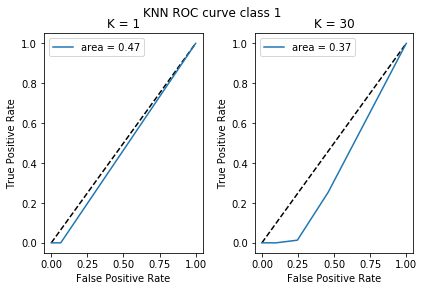

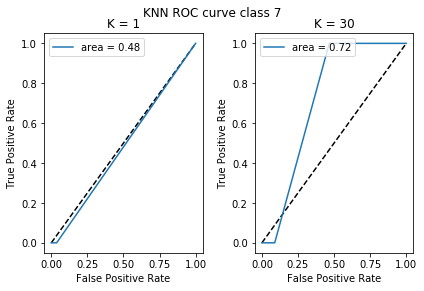

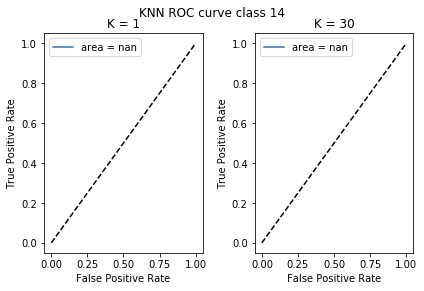

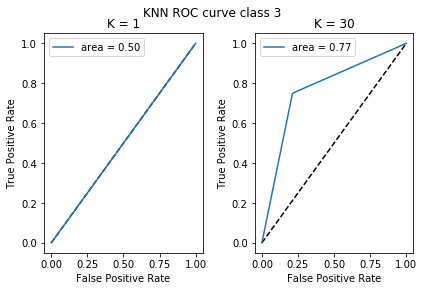

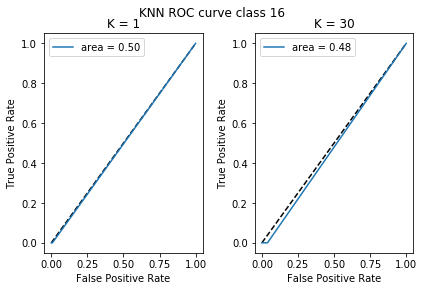

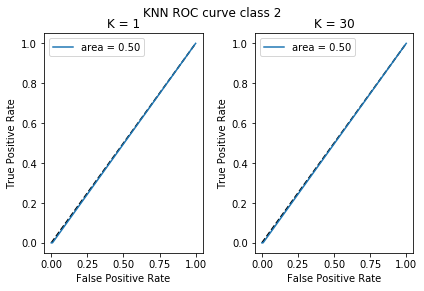

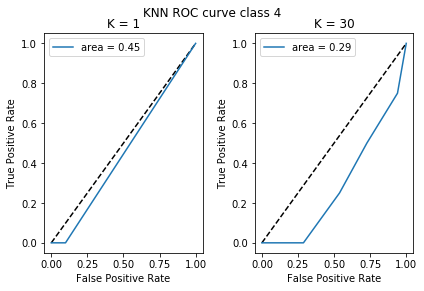

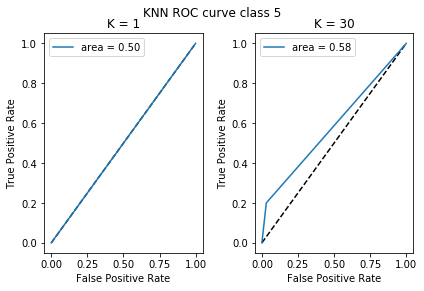

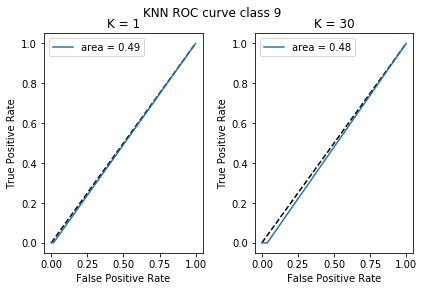

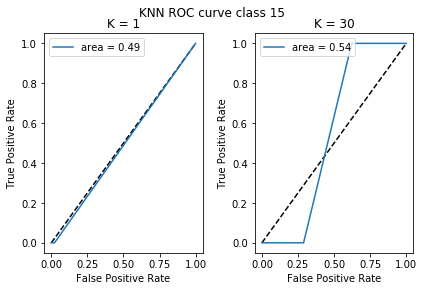

In [267]:
y_test_score_clf_1 = knn_clf_1.predict_proba(X_test)
y_test_score_clf_30 = knn_clf_30.predict_proba(X_test)
fpr_1 = dict()
tpr_1 = dict()
roc_auc_1 = dict()
fpr_30 = dict()
tpr_30 = dict()
roc_auc_30 = dict()
for i, label in enumerate(y.unique()):
    fpr_1[label], tpr_1[label], _ = roc_curve((y_test == label).astype(int), y_test_score_clf_1[:, i])
    roc_auc_1[label] = auc(fpr_1[label], tpr_1[label])
    fpr_30[label], tpr_30[label], _ = roc_curve((y_test == label).astype(int), y_test_score_clf_30[:, i])
    roc_auc_30[label] = auc(fpr_30[label], tpr_30[label])
    plot_roc_curve(tpr_1[label], fpr_1[label],tpr_30[label], fpr_30[label], roc_auc_1[label], roc_auc_30[label], label)

## Part (d): Hyperparameter Tuning

In [268]:
from sklearn.model_selection import GridSearchCV

In [269]:
param_grid = {'n_neighbors': list(range(1,41)), 'metric': ['euclidean', 'manhattan', 'cosine']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted', cv=10, verbose=3)
grid_search.fit(X_train, y_train)

ine, n_neighbors=26, score=0.388, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.369, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.369, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.426, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.369, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.369, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n_neighbors=27, score=0.369, total=   0.0s
[CV] metric=cosine, n_neighbors=27 ...................................
[CV] ....... metric=cosine, n

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=3)

In [270]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [271]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 2}

In [272]:
grid_search.best_score_

0.5411688395479657

In [273]:
grid_train_pred = grid_search.predict(X_train)
grid_test_pred = grid_search.predict(X_test)

Confusion Matrix Train:
 [[170   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 14  15   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  10   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   6   0   0   0   0   0   0   0   0   0]
 [  4   0   0   1   3   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   5   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   5   0   0   0   0]
 [ 22   0   1   0   0   2   0   0   0  14   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   3   0]
 [  8   2   0   0   1   2   0   0   0   1   0   1   0]]


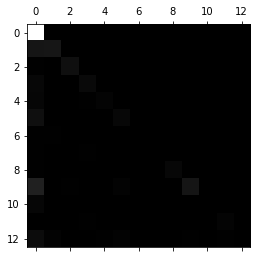

Confusion Matrix Test:
 [[67  2  0  0  0  5  1  0  0  0  0]
 [14  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  2  0  0  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0  0  0  1  0  0]
 [10  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0]
 [ 9  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0]
 [ 6  1  0  0  0  0  0  0  0  0  0]]


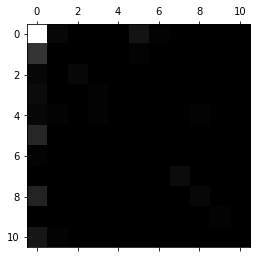

In [274]:
conf_train_grid = confusion_matrix(y_train, grid_train_pred)
conf_test_grid = confusion_matrix(y_test, grid_test_pred)
print('Confusion Matrix Train:\n', conf_train_grid)
plt.matshow(conf_train_grid, cmap=plt.cm.gray)
plt.show()
print('Confusion Matrix Test:\n', conf_test_grid)
plt.matshow(conf_test_grid, cmap=plt.cm.gray)
plt.show()

In [275]:
print('Train Classification Report:\n', classification_report(y_train, grid_train_pred))
print('Test Classification Report:\n', classification_report(y_test, grid_test_pred))

Train Classification Report:
               precision    recall  f1-score   support

           1       0.71      1.00      0.83       170
           2       0.83      0.52      0.64        29
           3       0.91      0.91      0.91        11
           4       0.67      0.55      0.60        11
           5       0.75      0.38      0.50         8
           6       0.56      0.33      0.42        15
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      0.83      0.91         6
          10       0.93      0.36      0.52        39
          14       0.00      0.00      0.00         4
          15       0.75      0.75      0.75         4
          16       0.00      0.00      0.00        15

    accuracy                           0.73       316
   macro avg       0.55      0.43      0.47       316
weighted avg       0.70      0.73      0.68       316

Test Classification Report:
               precis

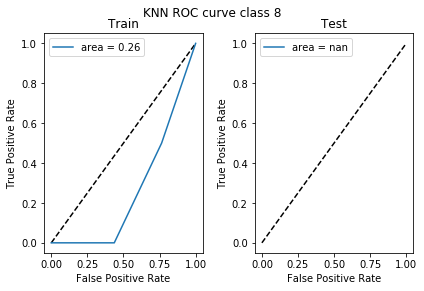

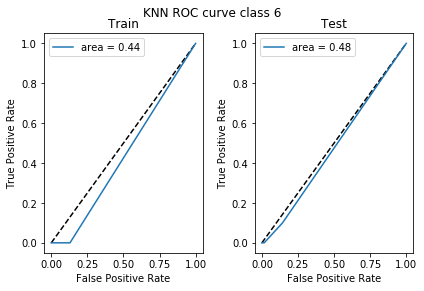

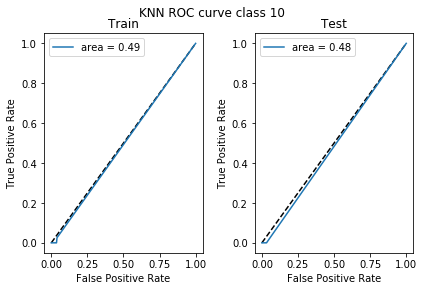

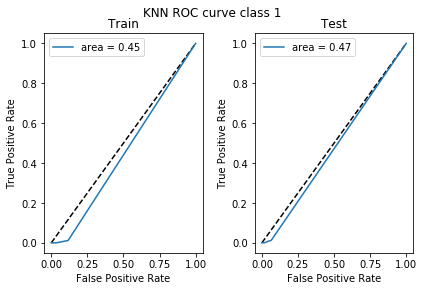

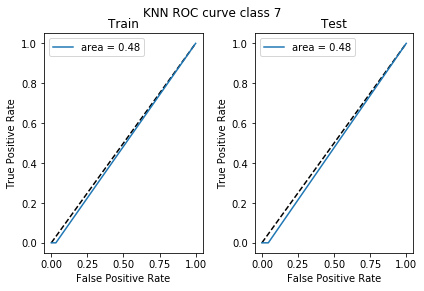

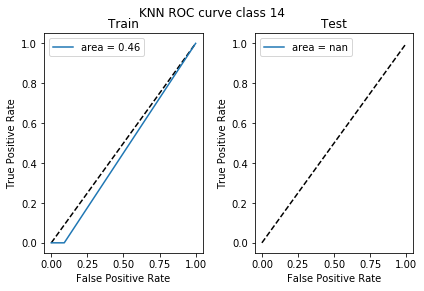

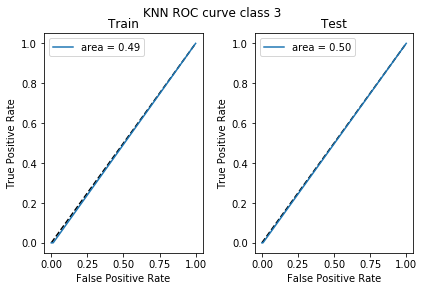

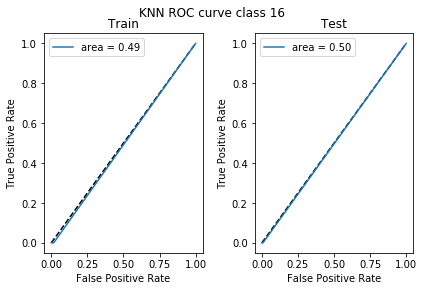

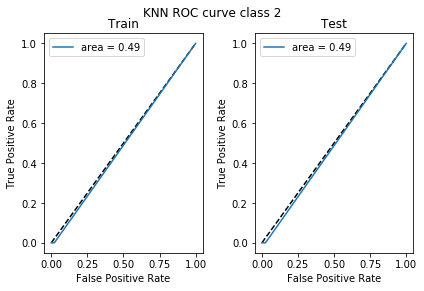

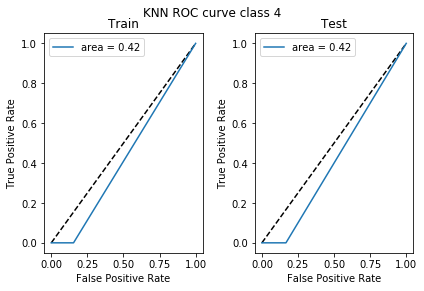

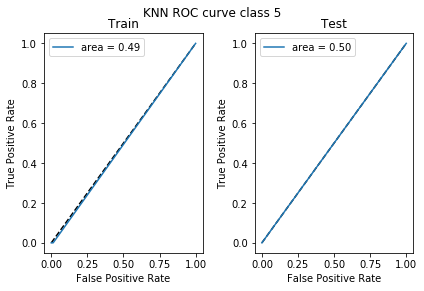

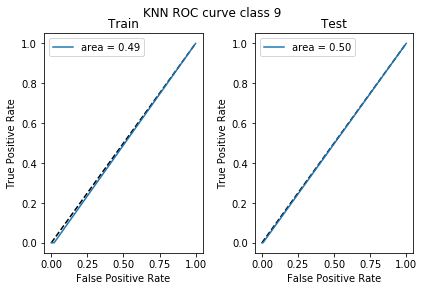

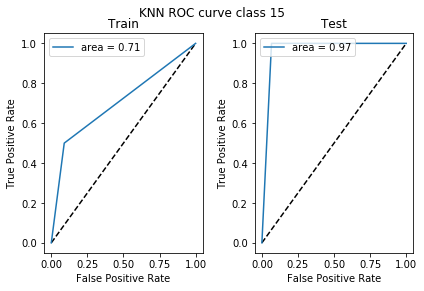

In [276]:
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
y_train_score = grid_search.predict_proba(X_train)
y_test_score = grid_search.predict_proba(X_test)
for i, label in enumerate(y.unique()):
    fpr_train[label], tpr_train[label], _ = roc_curve((y_train == label).astype(int), y_train_score[:, i])
    roc_auc_train[label] = auc(fpr_train[label], tpr_train[label])
    fpr_test[label], tpr_test[label], _ = roc_curve((y_test == label).astype(int), y_test_score[:, i])
    roc_auc_test[label] = auc(fpr_test[label], tpr_test[label])
    fig, axes = plt.subplots(1, 2)
    axes[0].plot([0,1],[0,1],'k--')
    axes[0].plot(fpr_train[label],tpr_train[label], label='area = %0.2f' % roc_auc_train[label])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Train')
    axes[0].legend(loc="upper left")
    axes[1].plot([0,1],[0,1],'k--')
    axes[1].plot(fpr_test[label],tpr_test[label], label='area = %0.2f' % roc_auc_test[label])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Test')
    axes[1].legend(loc="upper left")
    fig.suptitle('KNN ROC curve class %s' % label, y=1)
    fig.tight_layout()